In [13]:
# [RDKitにおける記述子の扱い方をリピンスキーの法則を通して学ぶ | 化学の新しいカタチ](https://future-chem.com/rdkit-descriptors/)

In [1]:
import pandas as pd
import seaborn as sns
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors
import py3Dmol

RDKit WARNING: [08:32:55] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# read molecule
suppl = Chem.SDMolSupplier('./sdf/platinum_dataset_2017_01.sdf')
mols = [x for x in suppl if x is not None]
len(mols)

4548

In [3]:
desc_list = Descriptors.descList
len(desc_list)

200

In [4]:
desc_list[:3]

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>)]

In [5]:
xxx = 2
print(Chem.rdMolDescriptors.CalcNumLipinskiHBA(mols[xxx]))
print(Chem.rdMolDescriptors.CalcNumLipinskiHBD(mols[xxx]))
print(Chem.rdMolDescriptors.CalcNumHBA(mols[xxx]))
print(Chem.rdMolDescriptors.CalcNumHBD(mols[xxx]))

8
2
6
2


In [6]:
# calculate object for descriptor
calc = {}
for i,j in desc_list:
    calc[i] = j

lipinski_list = ['NumHDonors', 'NumHAcceptors', 'MolWt', 'MolLogP']

# function for judging Rule Of Five
def calc_lipinski(mol):
    lipinski = {}
    for desc in lipinski_list:
        lipinski[desc] = calc[desc](mol)
    return lipinski

def check_lipinski(dic):
    if dic['MolWt'] <= 500 and dic['MolLogP'] <= 5 and dic['NumHDonors'] <= 5 and dic['NumHAcceptors'] <= 10:
        return True
    else:
        return False


def rule_of_five(mol):
    prop = calc_lipinski(mol)
    if check_lipinski(prop):
        return mol



In [7]:
# calculate specifically
lipinski_mols = []
bad_mols = []
for m in mols:
    if rule_of_five(m):
        lipinski_mols.append(m)
    else:
        bad_mols.append(m)

len(lipinski_mols), len(bad_mols)

(3574, 974)

In [8]:
xxx = 1
print(calc_lipinski(mols[xxx]))
print(check_lipinski(calc_lipinski(mols[xxx])))

{'NumHDonors': 0, 'NumHAcceptors': 7, 'MolWt': 439.5190000000002, 'MolLogP': 3.816200000000002}
True


In [9]:
# visualize by py3Dmol
v = py3Dmol.view(width=800, height=600, linked=False, viewergrid=(3,4))
grid = [(i, j) for i in range(3) for j in range(4)]
for m, g in zip(bad_mols[:12], grid):
    mb = Chem.MolToMolBlock(m)
    v.addModel(mb, 'sdf', viewer=g)
v.setStyle({'stick': {}})
v.setBackgroundColor('#EEEEEE')
v.zoomTo()
v.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

       NumHDonors  NumHAcceptors   MolWt  MolLogP
count      974.00         974.00  974.00   974.00
mean         3.24           8.24  481.71     0.98
std          2.15           4.19   84.27     4.33
min          0.00           0.00  182.17   -10.16
25%          2.00           5.00  424.43    -3.12
50%          3.00           7.00  506.08     2.21
75%          4.00          11.00  546.63     5.04
max         12.00          21.00  600.67     8.84
               NumHDonors  NumHAcceptors  MolWt  MolLogP
NumHDonors           1.00           0.36  -0.21    -0.65
NumHAcceptors        0.36           1.00   0.03    -0.77
MolWt               -0.21           0.03   1.00     0.30
MolLogP             -0.65          -0.77   0.30     1.00


,MolLogP,MolWt,NumHAcceptors
NumHDonors_cut,,,
"(0, 3]",2.47,496.58,7.52
"(3, 6]",-1.38,470.45,9.69
"(6, 9]",-4.43,402.60,10.54
"(9, 12]",-8.49,506.21,13.15


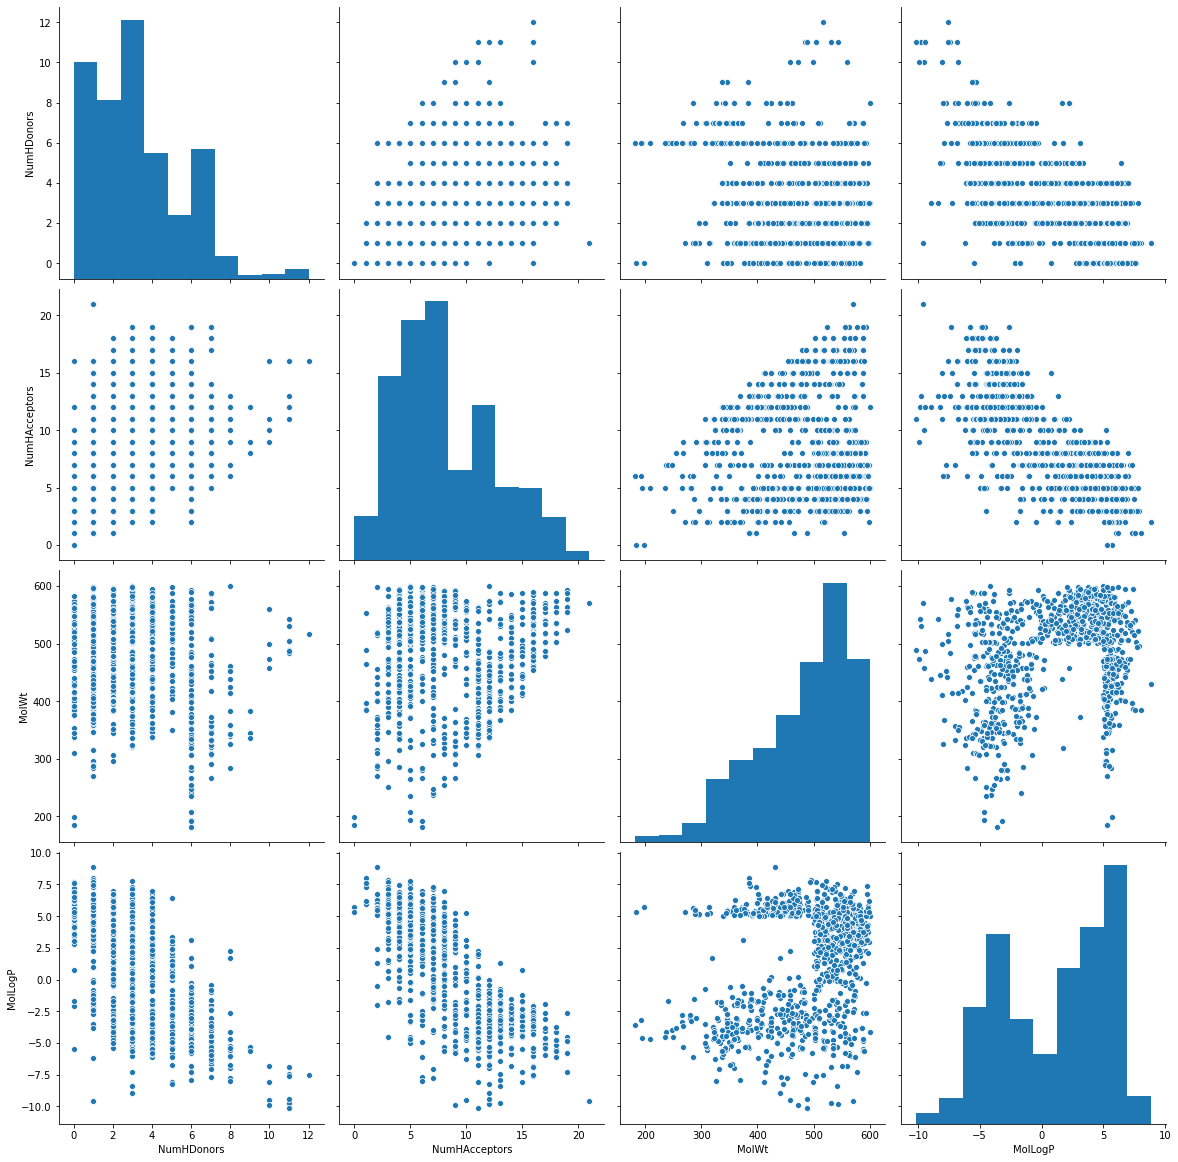

In [22]:
NumHDonors = []
NumHAcceptors = []
MolWt = []
MolLogP = []
for m in bad_mols:
    prop = calc_lipinski(m)
    NumHDonors.append(prop['NumHDonors'])
    NumHAcceptors.append(prop['NumHAcceptors'])
    MolWt.append(prop['MolWt'])
    MolLogP.append(prop['MolLogP'])
df = pd.DataFrame({'NumHDonors': NumHDonors,
                  'NumHAcceptors': NumHAcceptors,
                  'MolWt': MolWt,
                  'MolLogP': MolLogP})

print(df.describe().round(2))
print(df.corr().round(2))
sns.pairplot(df, height=4)
bins = range(0, 15, 3)
df['NumHDonors_cut'] = pd.cut(df.NumHDonors, bins)
df.groupby('NumHDonors_cut')[['MolLogP', 'MolWt', 'NumHAcceptors']].mean().round(2)